# Árbol de decisión para especies de flores...

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv("../../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 5)

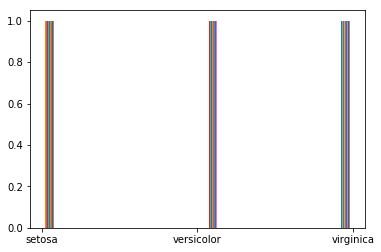

In [7]:
plt.hist((data["Species"]))
plt.show()

In [8]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [10]:
data["is_train"] = np.random.uniform(0, 1, len(data)) < 0.75
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [61]:
#plt.hist(data.is_train)
#plt.show()

In [11]:
train, test = data[data["is_train"] == True], data[data["is_train"] == False]

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 20, random_state = 99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [14]:
preds = tree.predict(test[predictors])

In [15]:
pd.crosstab(test[target], preds, rownames = ["Actual"], colnames = ["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,11,0,0
versicolor,0,11,0
virginica,0,2,10


## Visualización del árbol de decisión...

In [29]:
from sklearn.tree import export_graphviz

In [28]:
with open("../../resources/iris_tree.dot", "w") as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [27]:
import os
from graphviz import Source

In [56]:
file = open("../../resources/iris_tree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.585\\nsamples = 116\\nvalue = [39, 39, 38]"] ;\n1 [label="entropy = 0.0\\nsamples = 39\\nvalue = [39, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 77\\nvalue = [0, 39, 38]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.378\\nsamples = 41\\nvalue = [0, 38, 3]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.179\\nsamples = 37\\nvalue = [0, 36, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 1.0\\nsamples = 4\\nvalue = [0, 2, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.183\\nsamples = 36\\nvalue = [0, 1, 35]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n8 -> 

In [ ]:
Source(text)

## Cross Validation para la poda...

In [80]:
X = data[predictors]
Y = data[target]

In [81]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_split = 20, random_state = 99)
tree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [86]:
from sklearn.model_selection import KFold

In [92]:
cv = KFold(n_splits= 10, shuffle = True, random_state = 1)

In [93]:
from sklearn.model_selection import cross_val_score

In [102]:
scores = cross_val_score(tree, X, Y, scoring = "accuracy", cv = cv, n_jobs = 1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [101]:
score = np.mean(scores)
score

0.9333333333333333

In [109]:
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion = "entropy", max_depth = i, min_samples_split = 20, random_state = 99)
    tree.fit(X, Y) 
    cv = KFold(n_splits= 10, shuffle = True, random_state = 1)  
    scores = cross_val_score(tree, X, Y, scoring = "accuracy", cv = cv, n_jobs = 1) 
    score = np.mean(scores)
    print("Score para i = ",i, "es de ", score)
    print("   ", tree.feature_importances_)

Score para i =  1 es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2 es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3 es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10 es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [107]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Random Forest...

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
forest = RandomForestClassifier(n_jobs = 2, oob_score = True, n_estimators = 1000)
forest.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [116]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.98133333, 0.01866667, 0.        ],
       [0.99428571, 0.00571429, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.98133333, 0.01866667, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [117]:
forest.oob_score_

0.96